# Rectangular Grid Generation Using Oscillatory Interference

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Interactive display
import ipywidgets as widgets

Consider an area of the 2-dimensional plane:

In [2]:
delta = 0.01
x_min, x_max = -5, 5
y_min, y_max = -5, 5

x = np.arange(x_min, x_max, delta)
y = np.arange(y_min, y_max, delta)

The [`np.meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) function generates the coordinate matrices for the 2D grid:

In [3]:
X, Y = np.meshgrid(x, y)
print('X:')
print(X)
print('Y:')
print(Y)

X:
[[-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 ...
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]]
Y:
[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]


Consider a system of two 2-dimesional oscillators aligned with orthogonal directions:

$$
\begin{cases}
      f_1\left(x,y\right) = \cos(2\pi x) \\
      f_2\left(x,y\right) = \cos(2\pi y)
\end{cases}
$$

Note that we multiply arguments by $2\pi$ so the period of oscillation is equal to $1$.

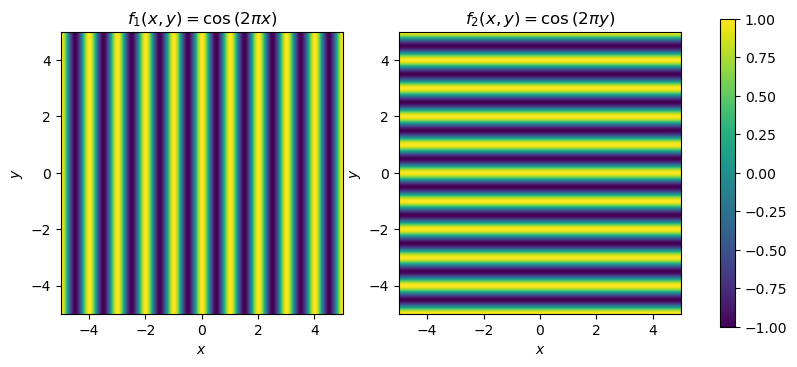

In [4]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

axes[0].imshow(np.cos(2 * np.pi * X), origin="lower", extent=[x_min, x_max, y_min, y_max])
axes[0].set_title(r"$f_1\left(x, y\right) = \cos\left(2 \pi x\right)$")
axes[0].set_xlabel(r"$x$")
axes[0].set_ylabel(r"$y$")

im = axes[1].imshow(np.cos(2 * np.pi * Y), origin="lower", extent=[x_min, x_max, y_min, y_max])
axes[1].set_title(r"$f_2\left(x, y\right) = \cos\left(2 \pi y\right)$")
axes[1].set_xlabel(r"$x$")
axes[1].set_ylabel(r"$y$")

cbar = fig.colorbar(im, ax=axes.ravel().tolist())

plt.show()

By the interference of these oscillators we'll get a rectangular chess-like pattern:

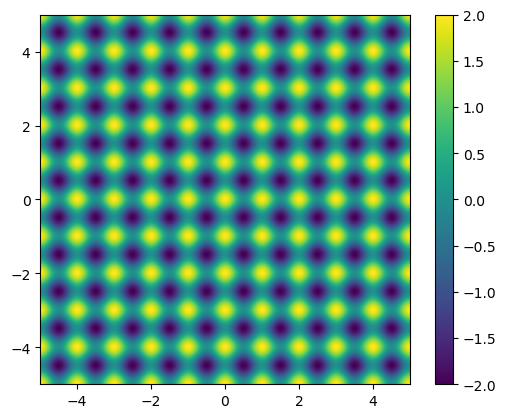

In [5]:
plt.imshow(np.cos(2 * np.pi * X) + np.cos(2 * np.pi * Y), origin="lower", extent=[x_min, x_max, y_min, y_max])
plt.colorbar();

Let's implement the function for generation of a rectangular grid with specified shift, scaling and rotation (and normalized output value):

In [6]:
def RectangularlGrid(X, Y, *, x_shift=0, y_shift=0, x_scaling=1, y_scaling=1, rotation=0):
    f_1 = np.cos(2 * np.pi * (x_scaling * (X - x_shift) * np.cos(rotation) + y_scaling * (Y - y_shift) * np.sin(rotation)))
    f_2 = np.cos(2 * np.pi * (x_scaling * (X - x_shift) * np.sin(rotation) - y_scaling * (Y - y_shift) * np.cos(rotation)))
    return (f_1 + f_2 + 2) / 4

The grid with default parameters can be easily reproduced. Note though that the values are scaled to the range $\left[0,1\right]$:

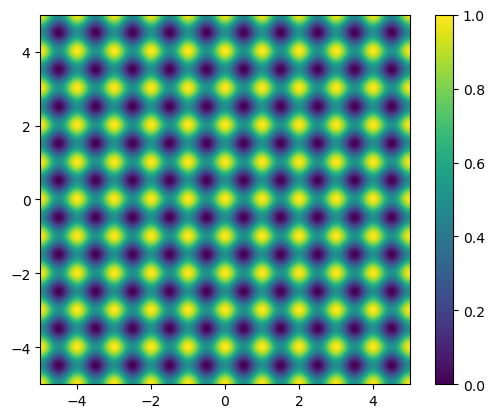

In [7]:
grid = RectangularlGrid(X, Y)

plt.imshow(grid, origin="lower", extent=[x_min, x_max, y_min, y_max])
plt.colorbar();

Let's look at how the rotation angle affects the grid. Here's rotation to $30\degree$ ($\dfrac{\pi}{6}$ radians):

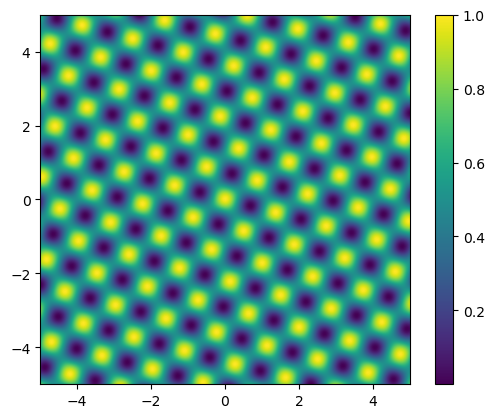

In [8]:
grid = RectangularlGrid(X, Y, rotation=np.pi/6)

plt.imshow(grid, origin="lower", extent=[x_min, x_max, y_min, y_max])
plt.colorbar();

Note that rotation to $90\degree$ ($\dfrac{\pi}{2}$ radians) produces the same grid as no rotation. So we may limit possible rotations to the range of $\left[0, \dfrac{\pi}{2}\right)$ radians.

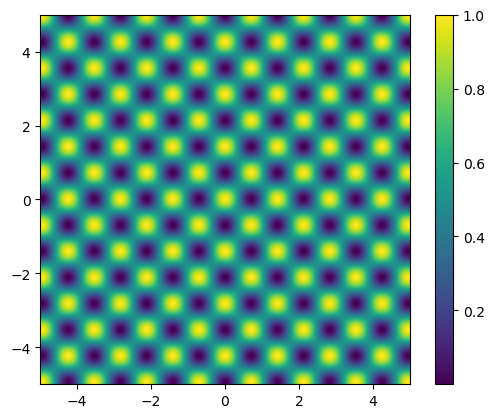

In [9]:
grid = RectangularlGrid(X, Y, rotation=np.pi/4)

plt.imshow(grid, origin="lower", extent=[x_min, x_max, y_min, y_max])
plt.colorbar();

Let's play a bit with other parameters:

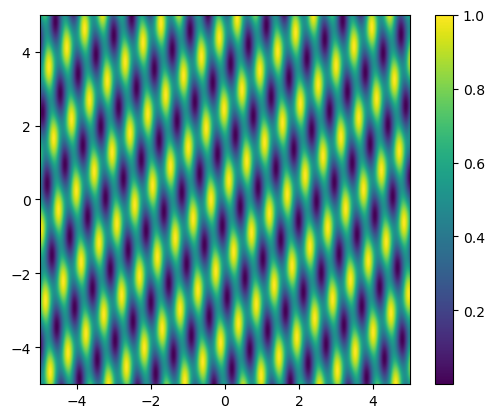

In [10]:
grid = RectangularlGrid(X, Y, x_shift=0.1, y_shift=0.5, x_scaling=2, y_scaling=0.5, rotation=np.pi/12)

plt.imshow(grid, origin="lower", extent=[x_min, x_max, y_min, y_max])
plt.colorbar();

And here's the interactive example:

In [11]:
@widgets.interact(
    x_shift=widgets.FloatSlider(0, min=-1.0, max=1.0),
    y_shift=widgets.FloatSlider(0, min=-1.0, max=1.0),
    x_scaling=widgets.FloatSlider(1, min=0.1, max=10),
    y_scaling=widgets.FloatSlider(1, min=0.1, max=10),
    rotation_degrees=widgets.FloatSlider(0, min=0, max=45)
    )
def plot_data_estimate(x_shift, y_shift, x_scaling, y_scaling, rotation_degrees):
  grid = RectangularlGrid(X, Y, x_shift=x_shift, y_shift=y_shift, x_scaling=x_scaling, y_scaling=y_scaling, rotation=rotation_degrees * np.pi / 180)
  plt.imshow(grid, origin="lower", extent=[x_min, x_max, y_min, y_max])
  plt.colorbar();

interactive(children=(FloatSlider(value=0.0, description='x_shift', max=1.0, min=-1.0), FloatSlider(value=0.0,…